## Artificial Neural Network (ANN)



*   Artificial Neural Network is a deep learning technique that attempts to mimic the learning process of the human brain. It has three layers; input layer, hidden layer and output layer. ANN forward propogates by aggregating the weighted variables from the input layer. It then applies the chosen activation function which decides whether to activate the neuron and pass the input to the next layer. In addition, ANN calculates the loss between the predicted and actual values, and attempts to minimise the loss through an optimisation function. Each forward and backward propagation is an epoch and users have to decide the number of epochs to be used







In [53]:
# import all necessary libraries

import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

sns.set(rc={'figure.figsize':{11.7,11.27}})

## Business Problem

To predict whether the patient has Breast Cancer based on whether the tumour is malignant or benign

## Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/



## Features

1) ID number

1.   ID number
2.   Diagnosis (M = malignant, B = benign)

2) Diagnosis 

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

In [2]:
#import raw data

raw_data = datasets.load_breast_cancer()

In [3]:
print(type(raw_data))

<class 'sklearn.utils.Bunch'>


In [4]:
# read the file into a dataframe

breast_cancer_df = pd.DataFrame(raw_data.data, columns= raw_data.feature_names)

breast_cancer_df['Target'] = pd.Series(raw_data.target)


In [25]:
# Summary of the type of Data
breast_cancer_df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [27]:
# check for nulls
breast_cancer_df.isnull().sum().value_counts()

0    31
dtype: int64

In [5]:
# Preview the dataset
breast_cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [6]:
# Look at the shape of the dataset
breast_cancer_df.shape

(569, 31)

In [22]:
#looking at correlation that is more than 0.5
breast_cancer_df.corr()[breast_cancer_df.corr()>0.5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
mean radius,1.000000,NaN,0.997855,0.987357,NaN,0.506124,0.676764,0.822529,NaN,NaN,...,NaN,0.965137,0.941082,NaN,NaN,0.526911,0.744214,NaN,NaN,NaN
mean texture,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean perimeter,0.997855,NaN,1.000000,0.986507,NaN,0.556936,0.716136,0.850977,NaN,NaN,...,NaN,0.970387,0.941550,NaN,NaN,0.563879,0.771241,NaN,NaN,NaN
mean area,0.987357,NaN,0.986507,1.000000,NaN,NaN,0.685983,0.823269,NaN,NaN,...,NaN,0.959120,0.959213,NaN,NaN,0.512606,0.722017,NaN,NaN,NaN
mean smoothness,NaN,NaN,NaN,NaN,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,NaN,NaN,NaN,0.805324,NaN,NaN,0.503053,NaN,NaN,NaN
mean compactness,0.506124,NaN,0.556936,NaN,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,NaN,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
mean concavity,0.676764,NaN,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,NaN,...,NaN,0.729565,0.675987,NaN,0.754968,0.884103,0.861323,NaN,0.514930,NaN
mean concave points,0.822529,NaN,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,NaN,NaN,...,NaN,0.855923,0.809630,NaN,0.667454,0.752399,0.910155,NaN,NaN,NaN
mean symmetry,NaN,NaN,NaN,NaN,0.557775,0.602641,0.500667,NaN,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.699826,NaN,NaN
mean fractal dimension,NaN,NaN,NaN,NaN,0.584792,0.565369,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,0.504942,NaN,NaN,NaN,NaN,0.767297,NaN


In [33]:
# get a dataframe with all the quartile information for EDA
breast_cancer_df_quartile = pd.DataFrame()
for (index, column) in enumerate(breast_cancer_df):
  try:
    breast_cancer_df_quartile[column+' Quartile'] = pd.qcut(breast_cancer_df[column],4, labels=[1,2,3,4])
  except:
    pass
breast_cancer_df_quartile['Target'] = breast_cancer_df['Target']

In [34]:
breast_cancer_df_quartile

,mean radius Quartile,mean texture Quartile,mean perimeter Quartile,mean area Quartile,mean smoothness Quartile,mean compactness Quartile,mean concavity Quartile,mean concave points Quartile,mean symmetry Quartile,mean fractal dimension Quartile,...,worst texture Quartile,worst perimeter Quartile,worst area Quartile,worst smoothness Quartile,worst compactness Quartile,worst concavity Quartile,worst concave points Quartile,worst symmetry Quartile,worst fractal dimension Quartile,Target
0,4,1,4,4,4,4,4,4,4,4,...,1,4,4,4,4,4,4,4,4,0
1,4,2,4,4,1,2,3,3,3,1,...,2,4,4,2,2,3,4,2,3,0
2,4,3,4,4,4,4,4,4,4,2,...,3,4,4,3,4,4,4,4,3,0
3,1,3,2,1,4,4,4,4,4,4,...,3,3,2,4,4,4,4,4,4,0
4,4,1,4,4,3,4,4,4,3,2,...,1,4,4,3,2,4,4,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,4,4,4,4,4,3,4,4,2,1,...,3,4,4,3,2,4,4,1,1,0
565,4,4,4,4,3,3,4,4,2,1,...,4,4,4,1,2,3,4,2,1,0
566,4,4,4,4,1,3,3,3,1,1,...,4,4,4,1,3,3,3,1,2,0
567,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,0


In [45]:
#changing categorical values to integer
breast_cancer_df_quartile = breast_cancer_df_quartile.apply(pd.to_numeric)
breast_cancer_df_quartile.dtypes.value_counts()

int64    31
dtype: int64

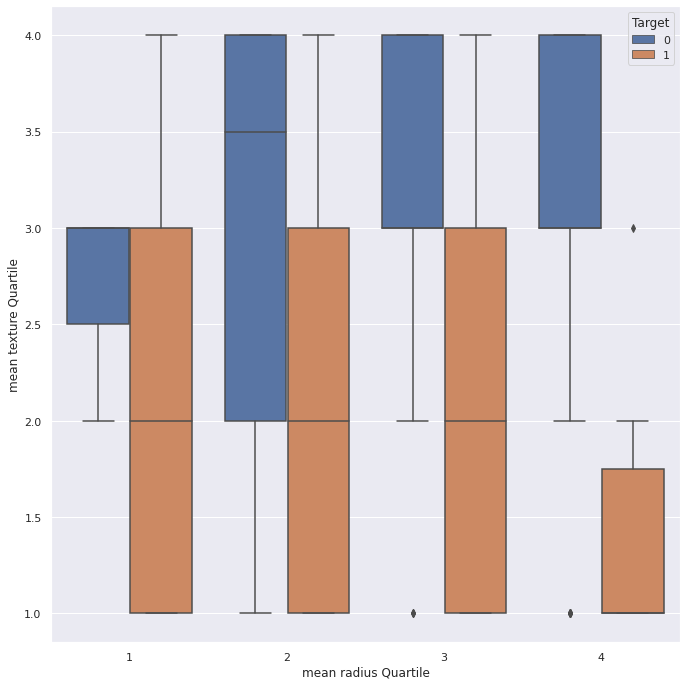

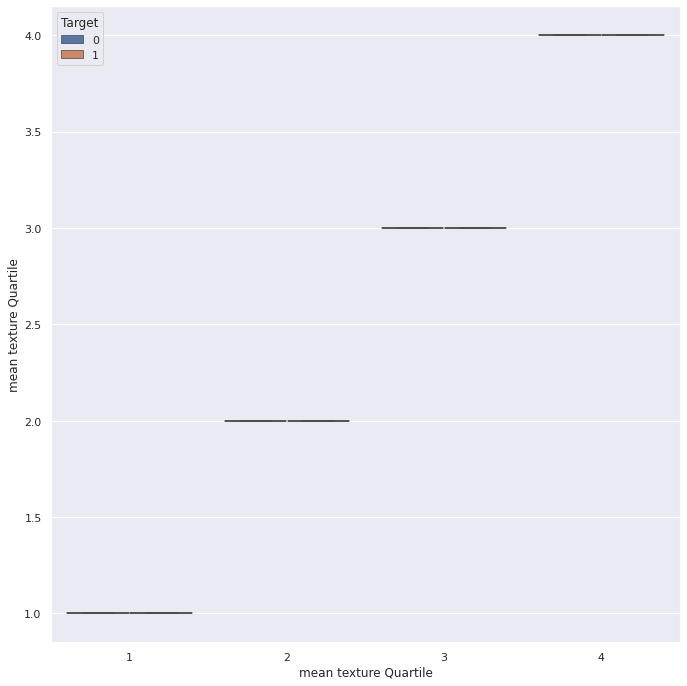

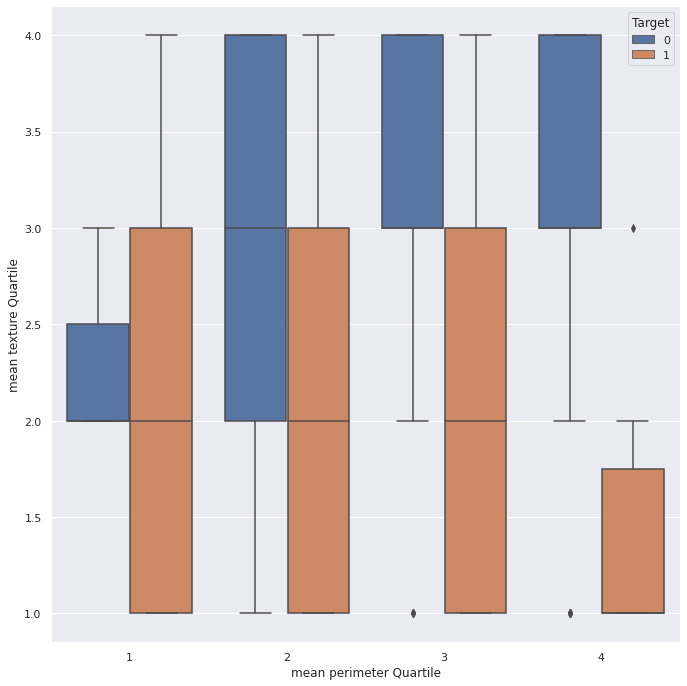

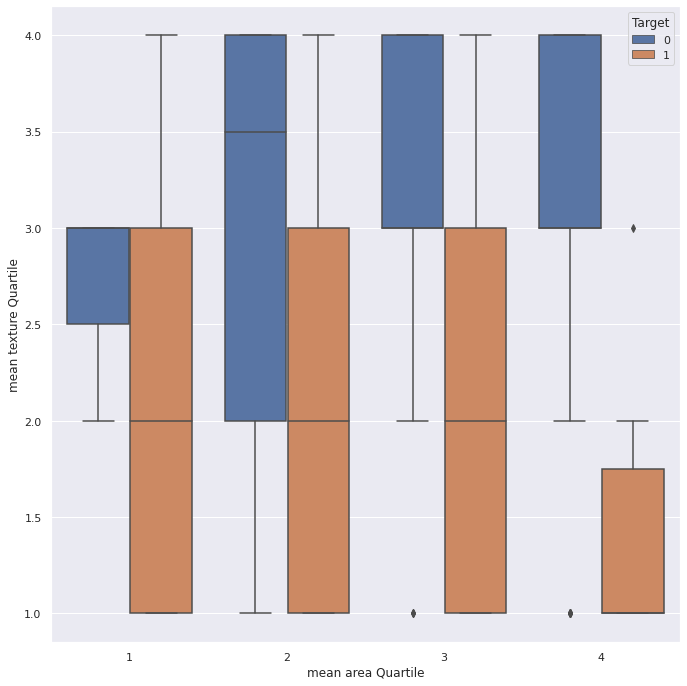

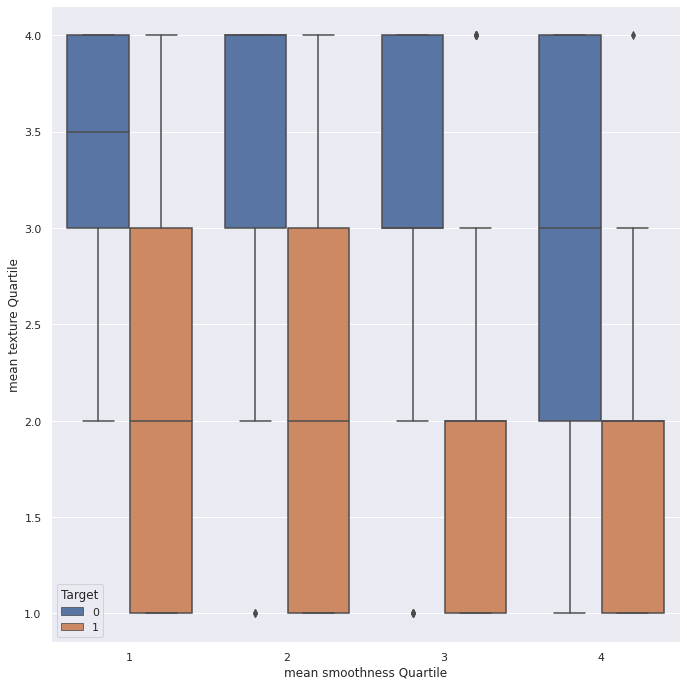

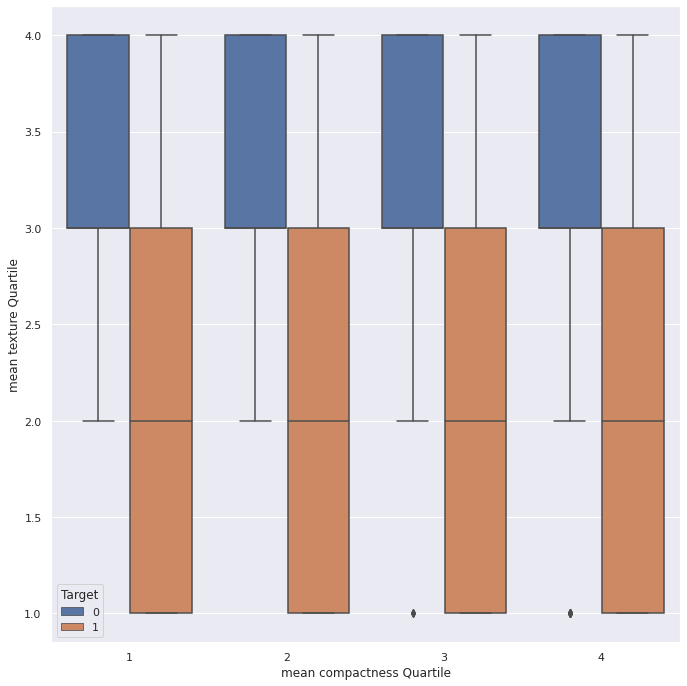

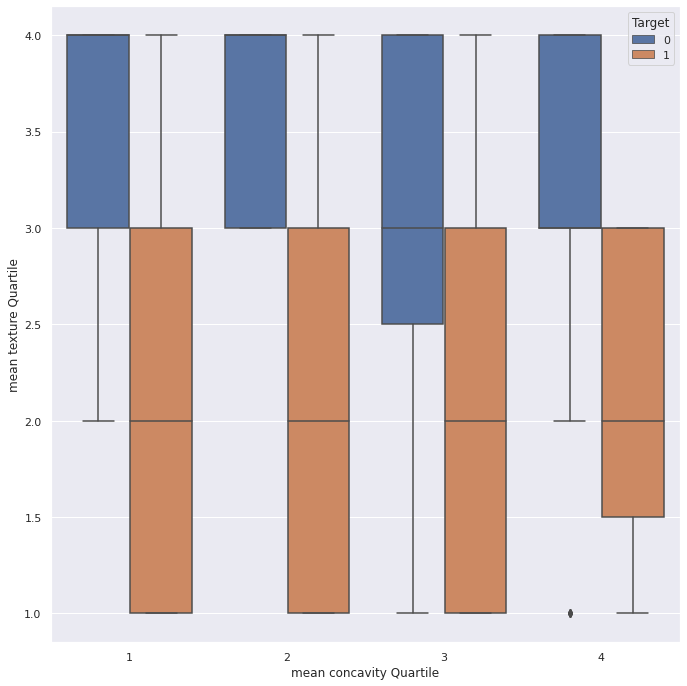

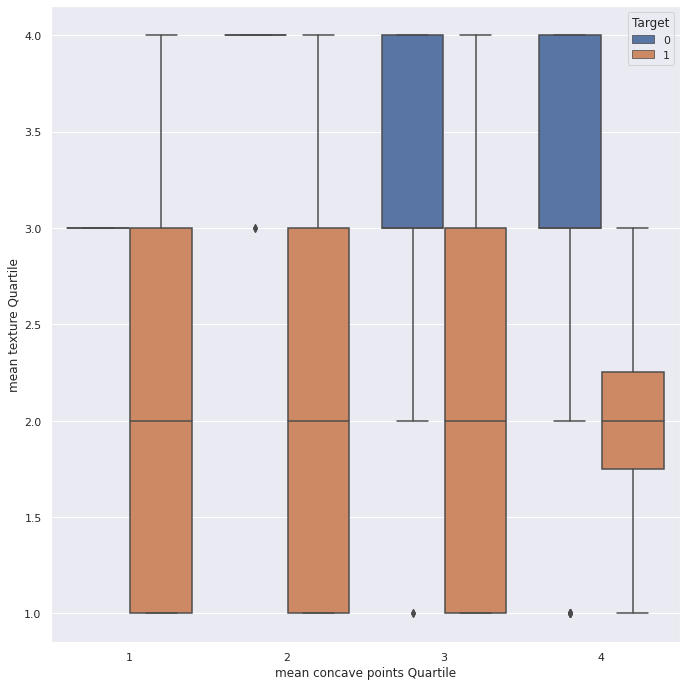

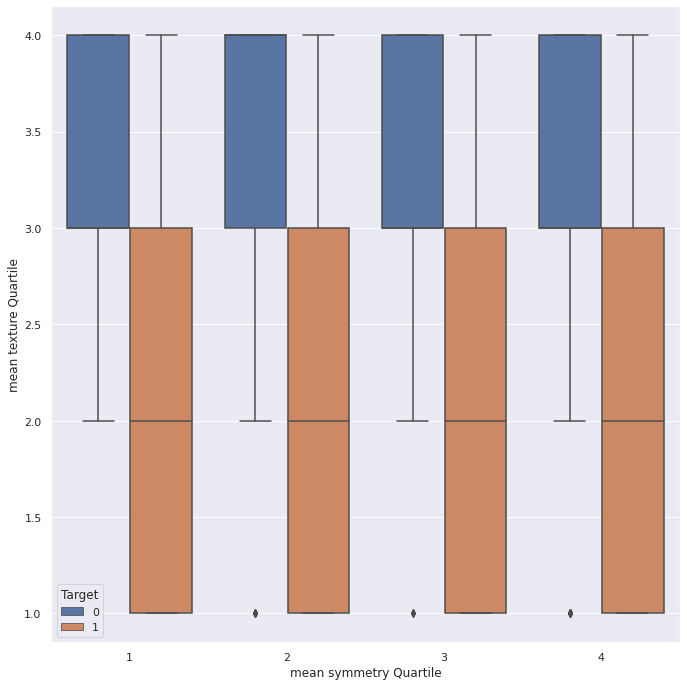

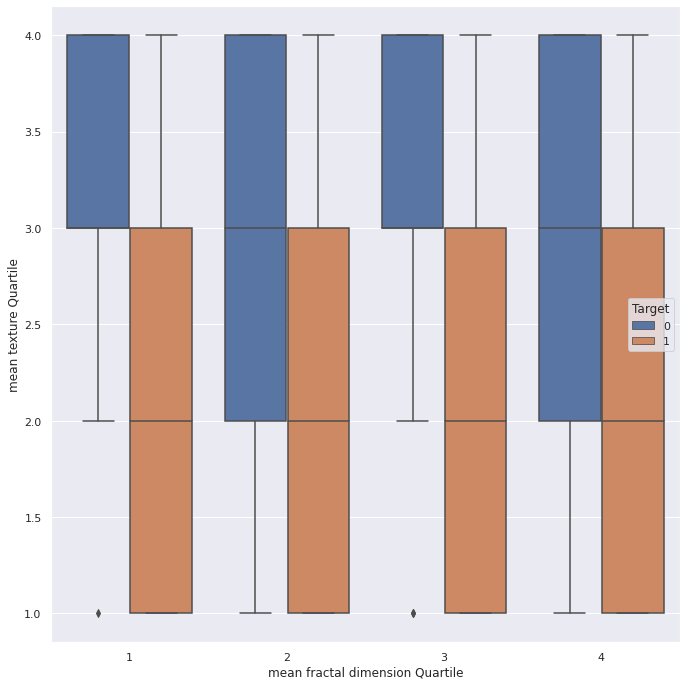

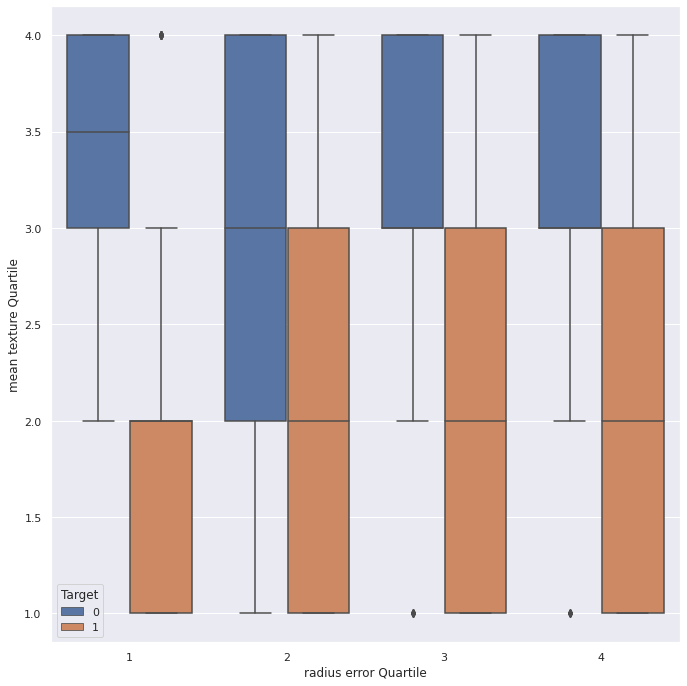

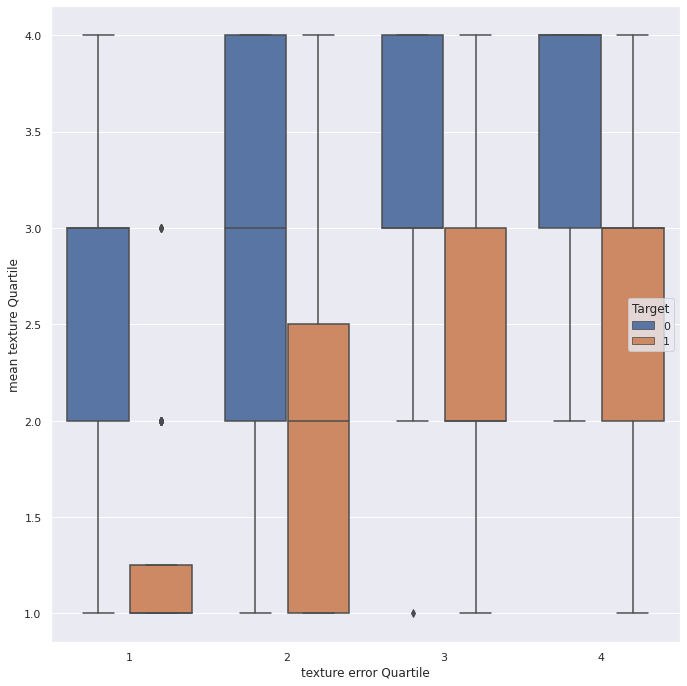

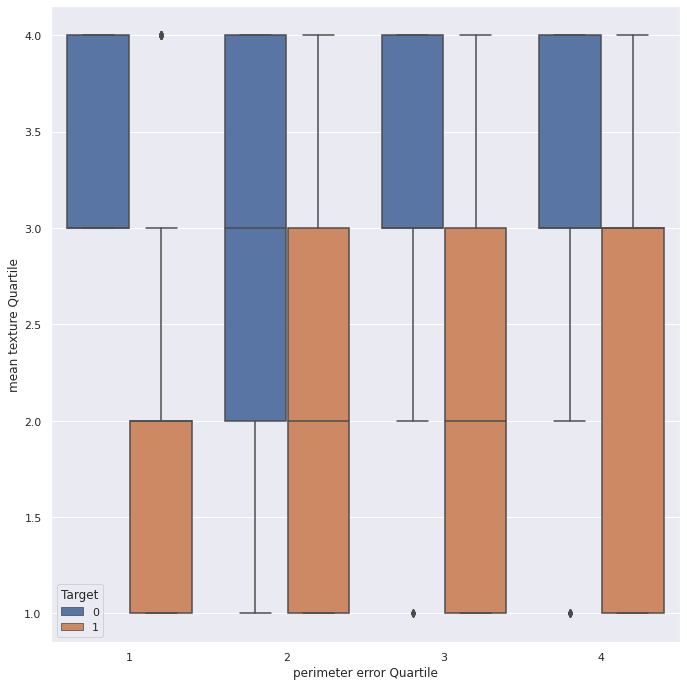

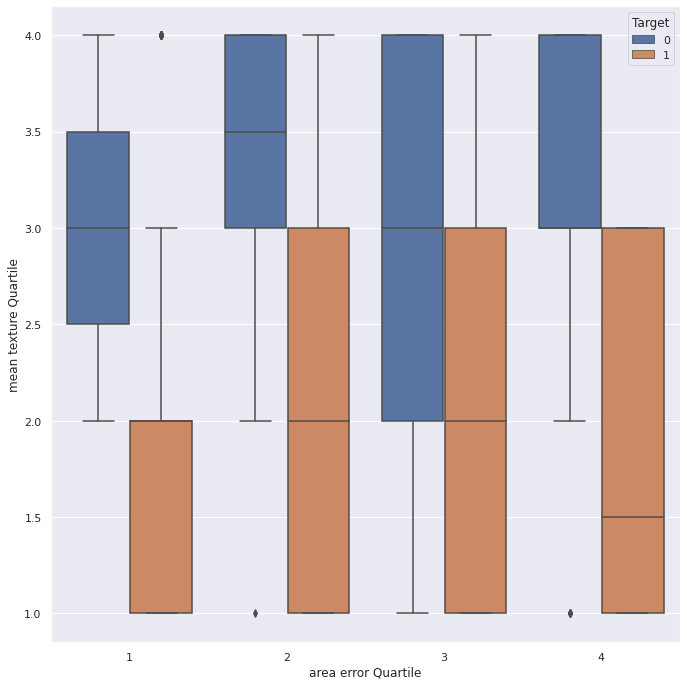

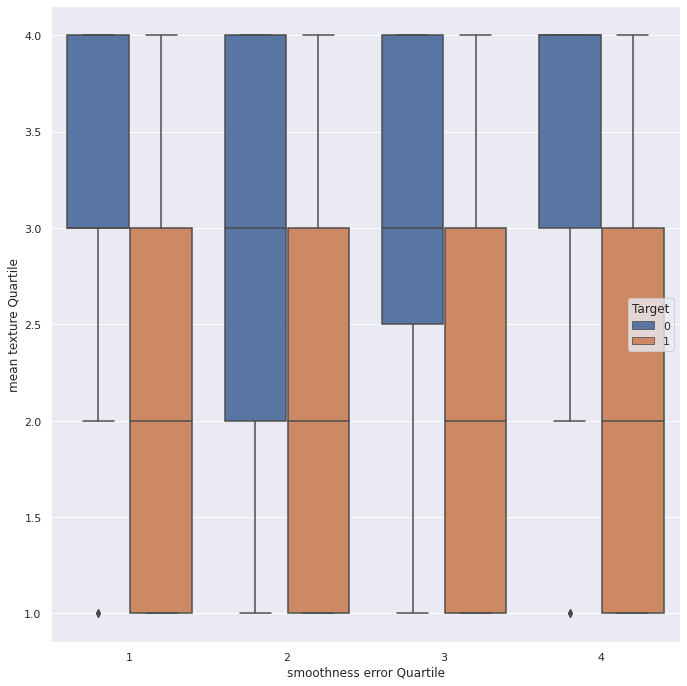

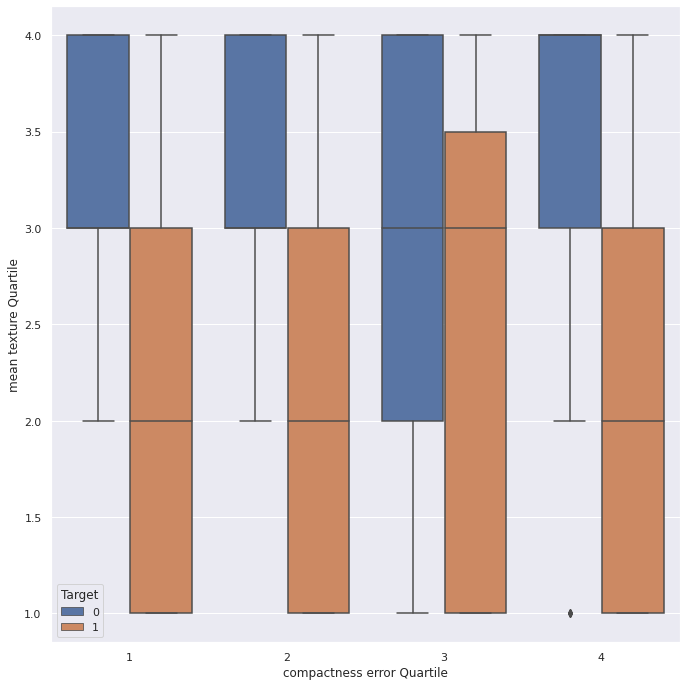

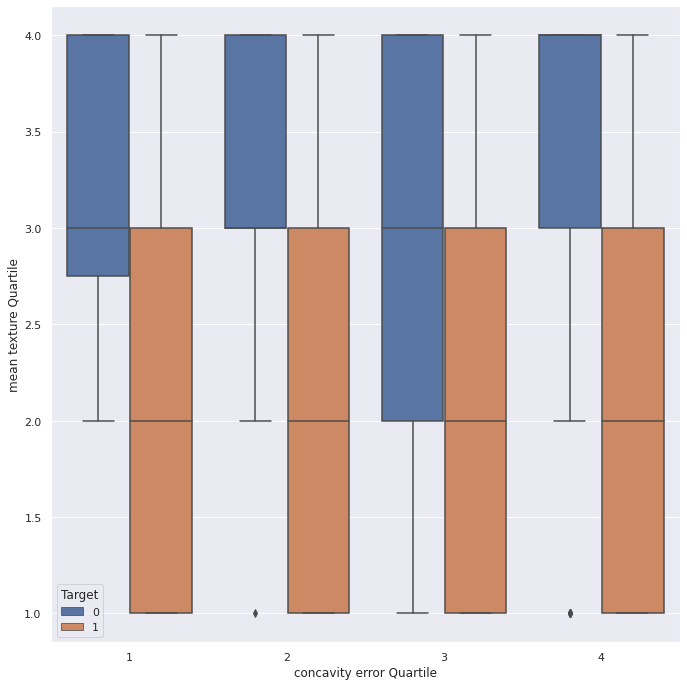

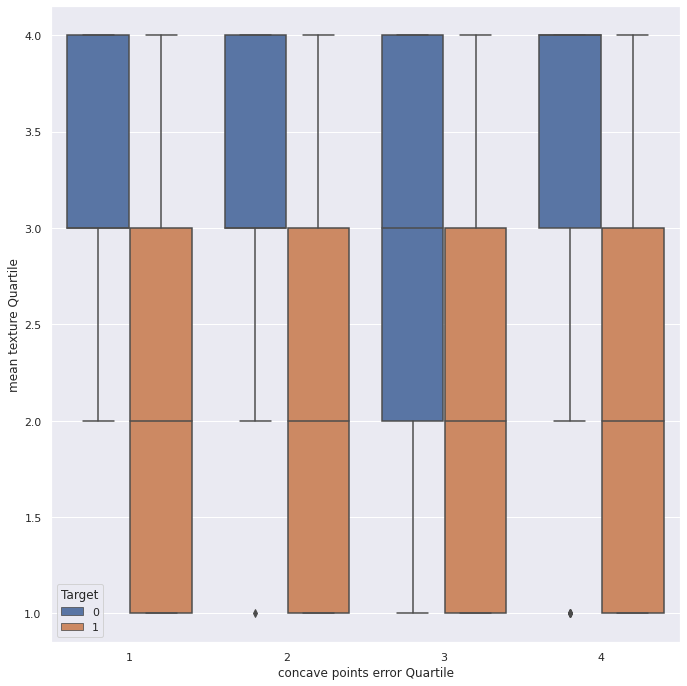

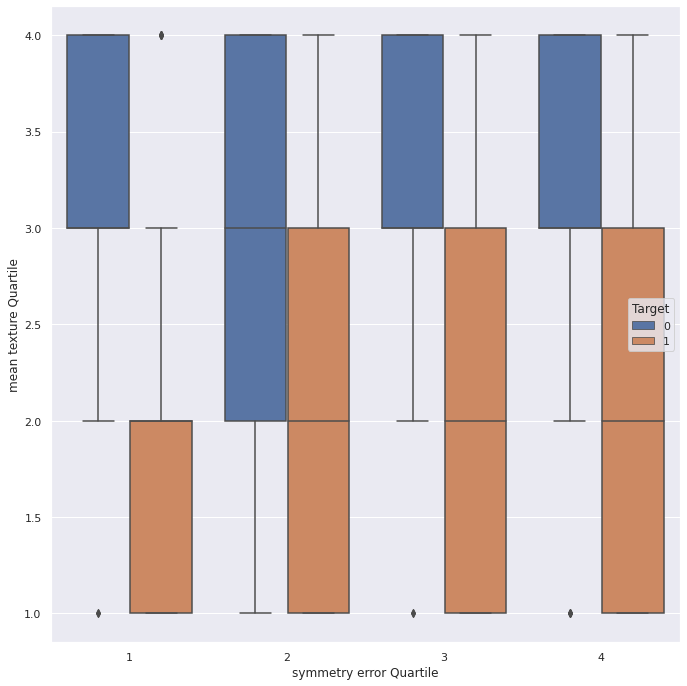

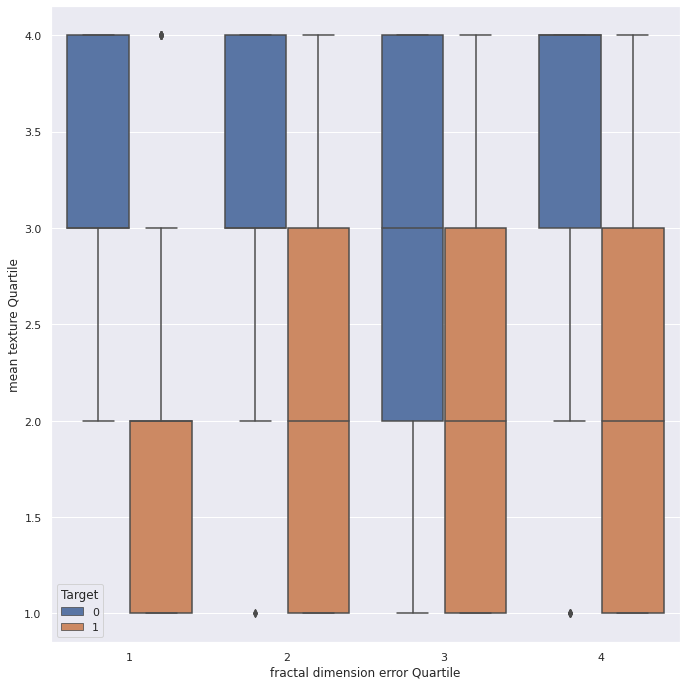

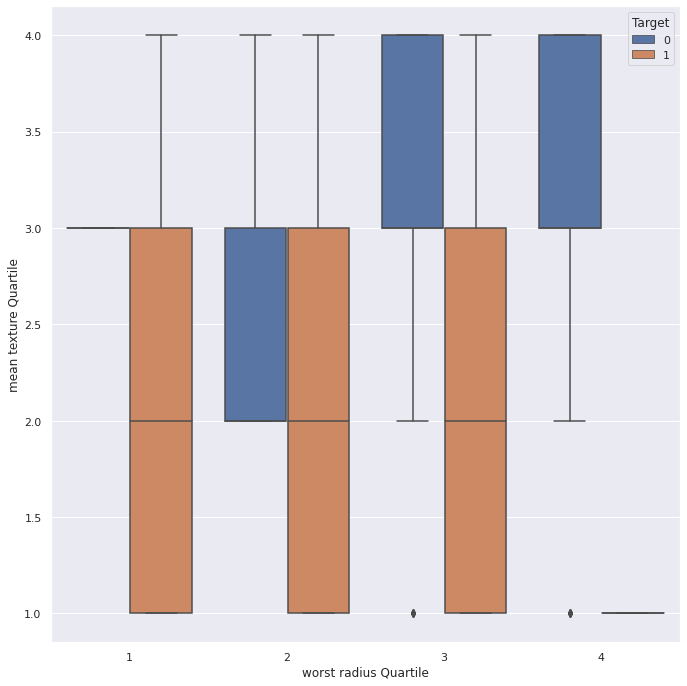

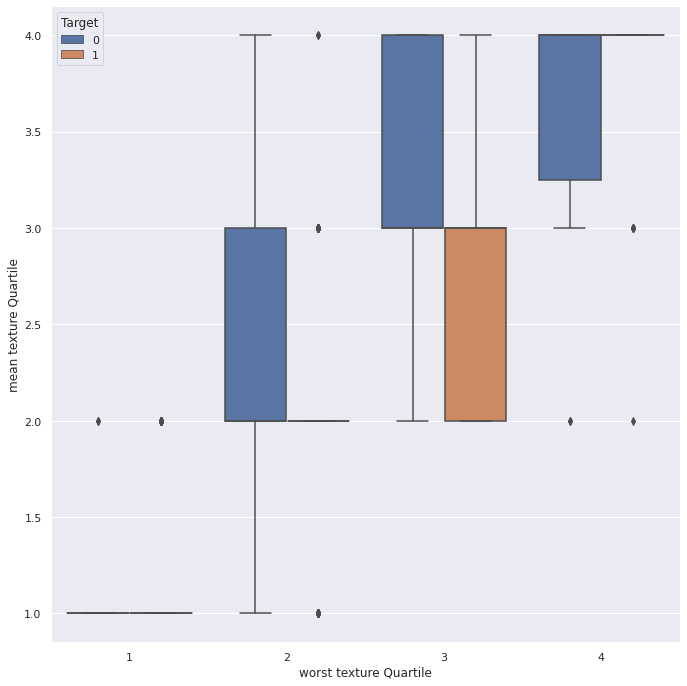

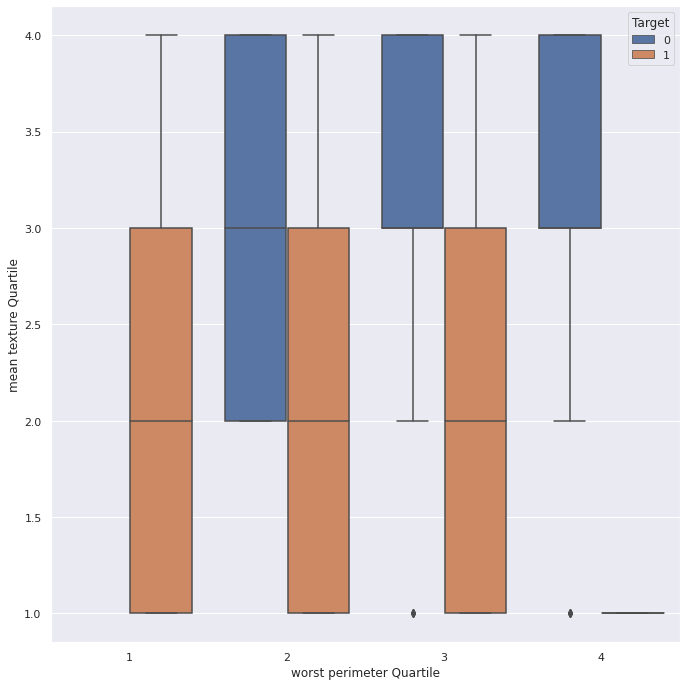

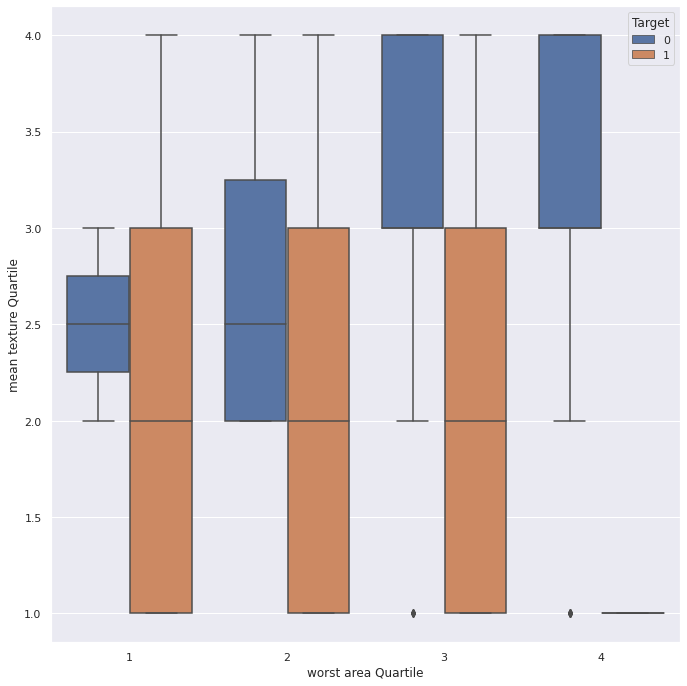

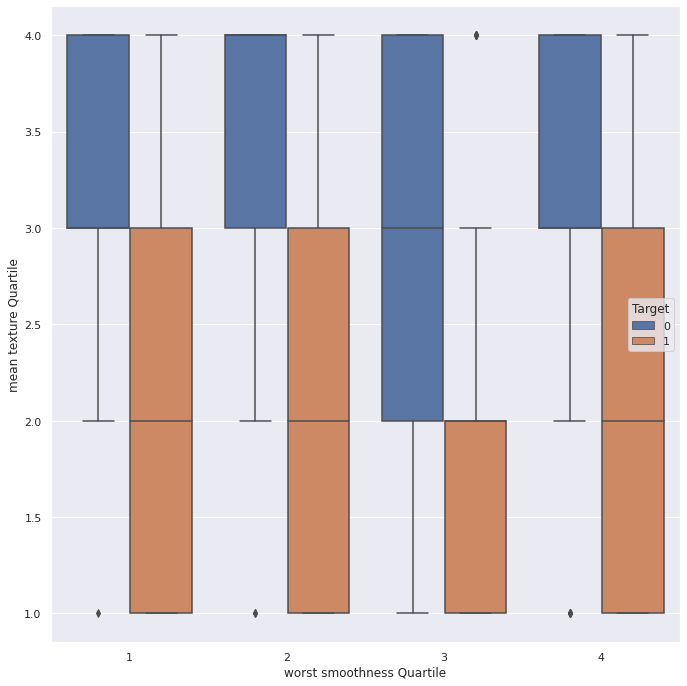

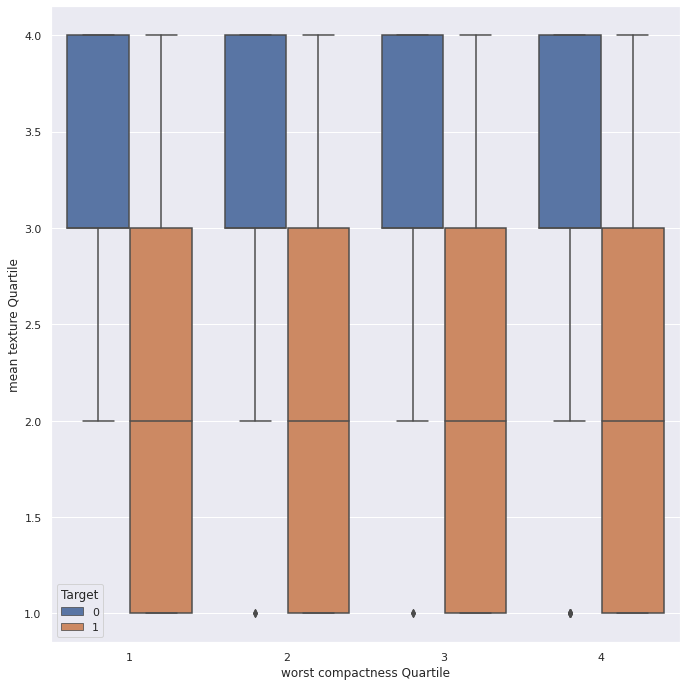

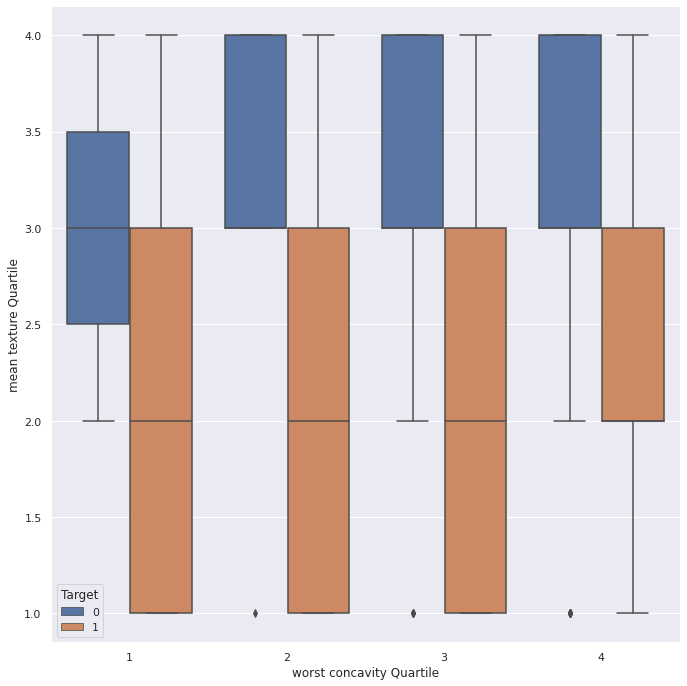

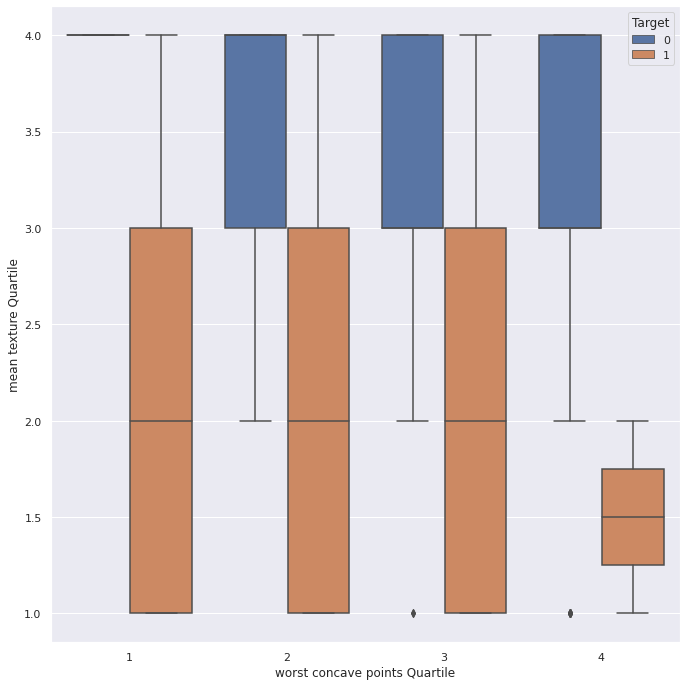

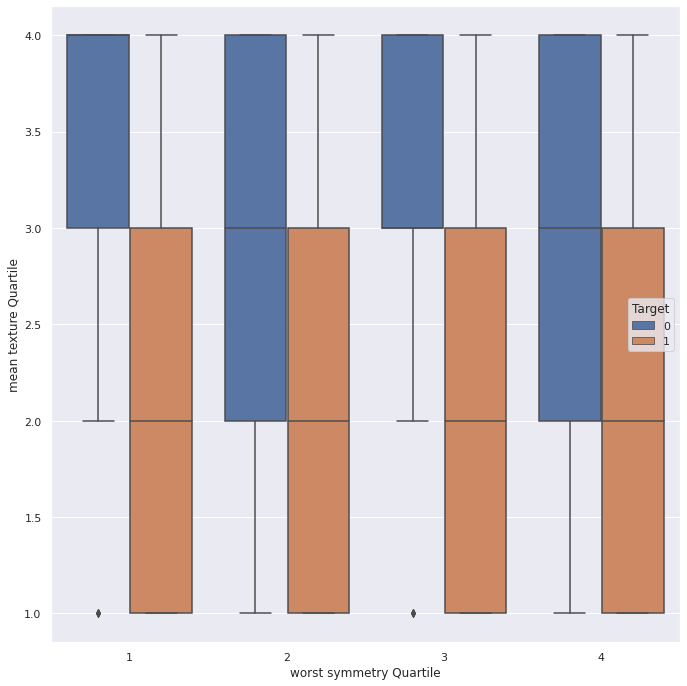

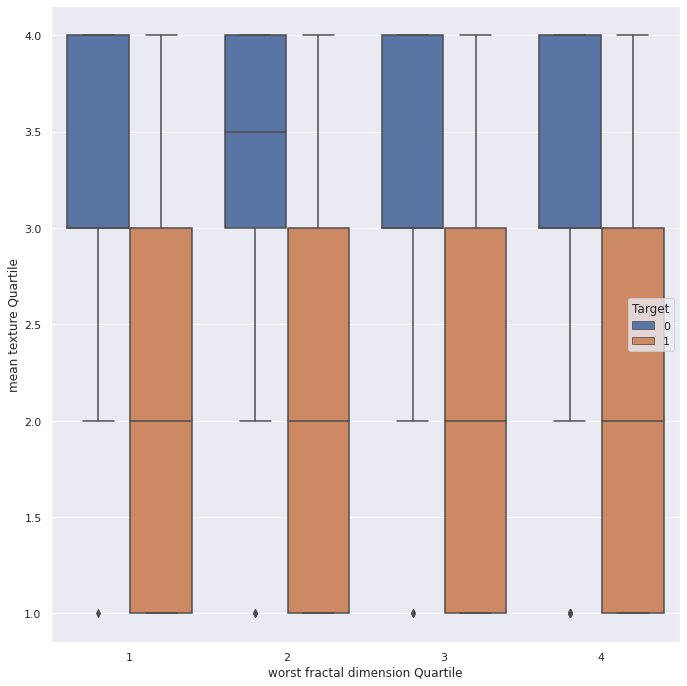

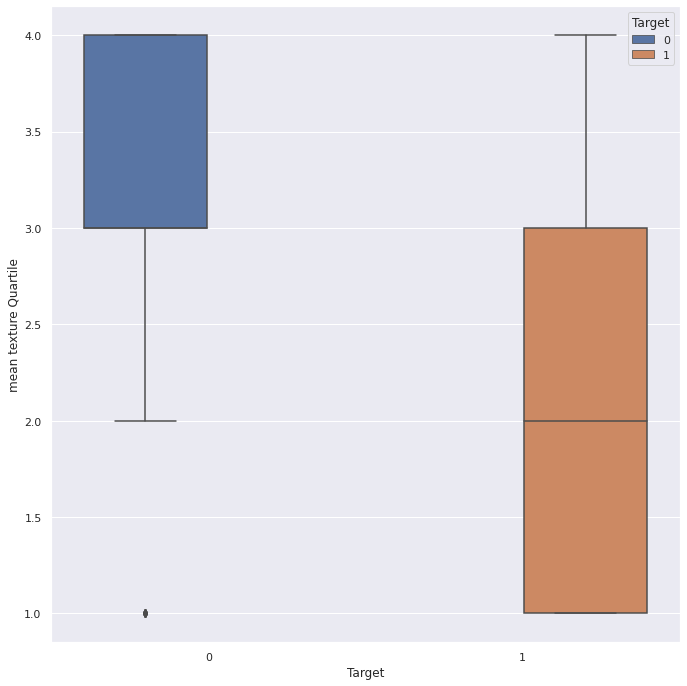

In [48]:
# Exploratory Data Analysis based on quartile
for (index, column) in enumerate(breast_cancer_df_quartile):
  sns.boxplot(x= column, y = 'mean texture Quartile', hue = 'Target', data= breast_cancer_df_quartile)
  plt.show()

In [49]:
# Getting data ready for modelling
y = breast_cancer_df['Target']
X = breast_cancer_df.drop('Target', axis=1)

In [51]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42, stratify=y)


In [52]:
# Scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [54]:
classifier = Sequential()

In [55]:
#input layer
classifier.add(Dense(units=30, activation='sigmoid'))

In [56]:
# hidden layer
classifier.add(Dense(units=15,activation='sigmoid'))

In [57]:
# output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [58]:
# compile all the layers into the neural network
classifier.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [59]:
# fitting model to the train data

model_history=classifier.fit(X_train,y_train,validation_split=0.33, batch_size=10 , epochs=100)

Epoch 1/100
27/27 [==============================] - 1s 11ms/step - loss: 0.6221 - accuracy: 0.7519 - val_loss: 0.5574 - val_accuracy: 0.9091
Epoch 2/100
27/27 [==============================] - 0s 4ms/step - loss: 0.5131 - accuracy: 0.8835 - val_loss: 0.4623 - val_accuracy: 0.8864
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 0.4315 - accuracy: 0.8985 - val_loss: 0.3850 - val_accuracy: 0.9318
Epoch 4/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3629 - accuracy: 0.9098 - val_loss: 0.3233 - val_accuracy: 0.9394
Epoch 5/100
27/27 [==============================] - 0s 4ms/step - loss: 0.3102 - accuracy: 0.9211 - val_loss: 0.2734 - val_accuracy: 0.9394
Epoch 6/100
27/27 [==============================] - 0s 3ms/step - loss: 0.2686 - accuracy: 0.9323 - val_loss: 0.2347 - val_accuracy: 0.9470
Epoch 7/100
27/27 [==============================] - 0s 5ms/step - loss: 0.2362 - accuracy: 0.9398 - val_loss: 0.2025 - val_accuracy: 0.9545
Epoch 8/100


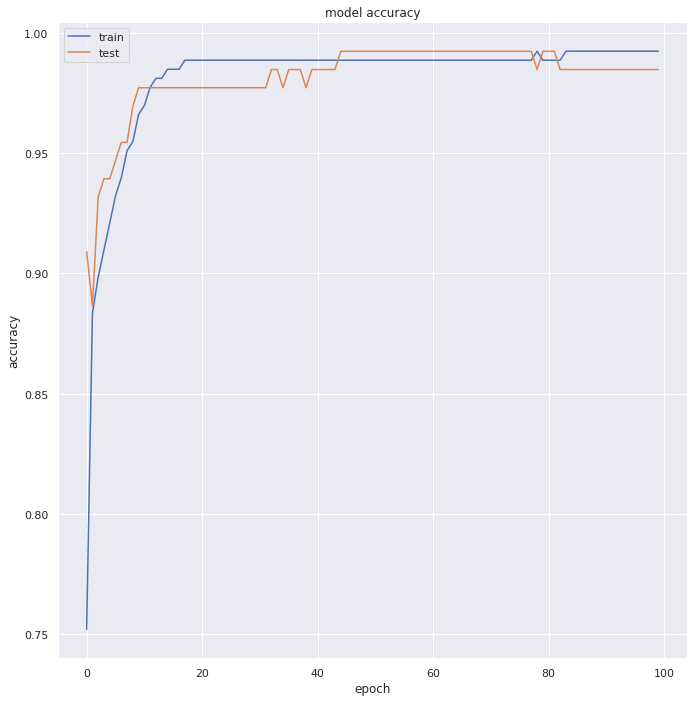

In [60]:
# plotting model accuracy to determine epoch

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [61]:
# Getting a prediction for the test data

y_pred= classifier.predict(X_test)
y_pred = (y_pred > 0.5)

6/6 [==============================] - 0s 2ms/step


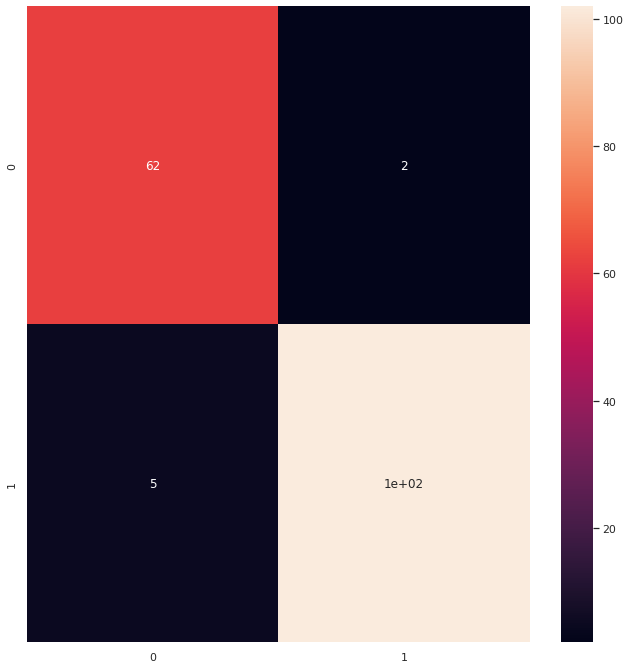

In [62]:
# Getting a visual representation of the confsuion matrix
cm= confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [64]:
# Getting an accuracy score for the model
score=accuracy_score(y_pred,y_test)
score

0.9590643274853801